In [1]:
import matplotlib.pyplot  as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

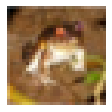

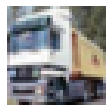

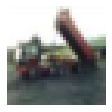

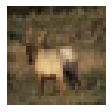

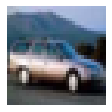

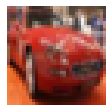

In [4]:
# displaying the first six images
for i in range (6):
  plt.subplot(230+1+i,)
  plt.imshow(x_train[i])
  plt.axis(False)
  plt.show()

In [5]:
# model building
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [7]:
# one-hot-encoding of targets
from keras.utils import to_categorical

In [8]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [9]:
# normalizing and scaling data values
x_train=x_train.reshape((50000,32,32,3))
x_train=x_train.astype('float32')/255.0
x_test=x_test.reshape((10000,32,32,3))
x_test=x_test.astype('float32')/255.0

In [10]:
#x_val=x_train[:10000]
#x_train_part=x_train[10000:]
#y_val=y_train[:10000]
#y_train_part=y_train[10000:]

In [11]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 44s 54ms/step - loss: 1.8678 - accuracy: 0.3153
Epoch 2/5
782/782 [==============================] - 35s 45ms/step - loss: 1.2912 - accuracy: 0.5431
Epoch 3/5
782/782 [==============================] - 40s 51ms/step - loss: 1.0806 - accuracy: 0.6194
Epoch 4/5
782/782 [==============================] - 48s 61ms/step - loss: 0.9508 - accuracy: 0.6676
Epoch 5/5
782/782 [==============================] - 45s 58ms/step - loss: 0.8497 - accuracy: 0.7066


In [12]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0505 - accuracy: 0.6375


In [13]:
test_acc

0.637499988079071

In [14]:
def summarize_diagnostics(history):
 # plot loss
 plt.subplot(211)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 plt.subplot(212)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
summarize_diagnostics(history)

In [15]:
# seeking to improve model by adding weight initialization,and regulation as well as dropout and batch normalization
model2 = models.Sequential()

In [16]:
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.4))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))

In [17]:
model2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 78s 97ms/step - loss: 2.1026 - accuracy: 0.3146
Epoch 2/5
782/782 [==============================] - 79s 102ms/step - loss: 1.3355 - accuracy: 0.5232
Epoch 3/5
782/782 [==============================] - 71s 90ms/step - loss: 1.1697 - accuracy: 0.5925
Epoch 4/5
782/782 [==============================] - 73s 93ms/step - loss: 1.0875 - accuracy: 0.6221
Epoch 5/5
782/782 [==============================] - 74s 95ms/step - loss: 1.0235 - accuracy: 0.6441


In [18]:
test_loss, test_acc = model2.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.3537 - accuracy: 0.5418


In [19]:
test_acc

0.5418000221252441

In [20]:
# improvement with weight initializer and data argument
model3 = models.Sequential()

In [21]:
model3.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',input_shape=(32, 32, 3)))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.2))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu',kernel_initializer='he_uniform'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(10, activation='softmax'))

In [22]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
model3.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(x_train,y_train, batch_size=64)
steps = int(x_train.shape[0] / 64)
history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=5)
#model3.fit(x_train, y_train, epochs=5, batch_size=64)

/home/saliu/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
781/781 [==============================] - 91s 114ms/step - loss: 1.9138 - accuracy: 0.3421
Epoch 2/5
781/781 [==============================] - 97s 124ms/step - loss: 1.3396 - accuracy: 0.5215
Epoch 3/5
781/781 [==============================] - 96s 123ms/step - loss: 1.1885 - accuracy: 0.5773
Epoch 4/5
781/781 [==============================] - 97s 124ms/step - loss: 1.1077 - accuracy: 0.6072
Epoch 5/5
781/781 [==============================] - 97s 124ms/step - loss: 1.0464 - accuracy: 0.6317


In [25]:
test_loss, test_acc = model2.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.3537 - accuracy: 0.5418
